Step 0, Max change: 17.158518687544667
Step 100, Max change: 34805.440145068045
Step 200, Max change: 32451.33451091493
Step 300, Max change: 32433.41328794504
Step 400, Max change: 32434.402160885533
Step 500, Max change: 32439.365667380916
Step 600, Max change: 32432.095421893115
Step 700, Max change: 32432.375977978692
Step 800, Max change: 32432.81135019272
Step 900, Max change: 32433.441696498798


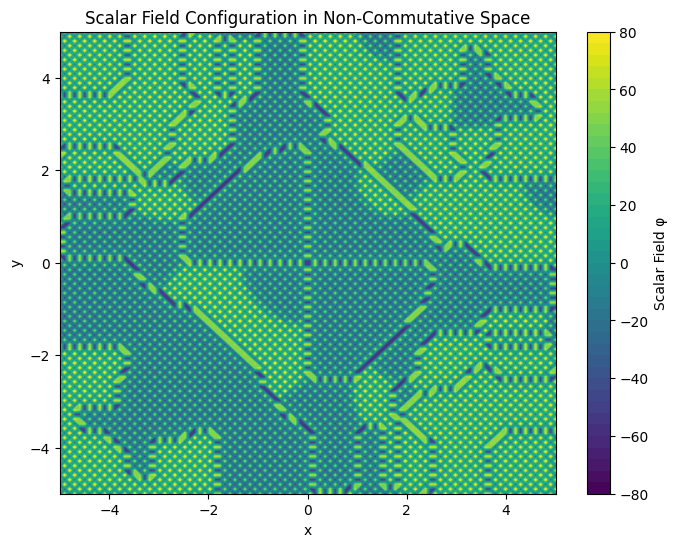

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny = 100, 100
x_vals = np.linspace(-5, 5, nx)
y_vals = np.linspace(-5, 5, ny)
dx = x_vals[1] - x_vals[0]
dy = y_vals[1] - y_vals[0]
X, Y = np.meshgrid(x_vals, y_vals)

# Initial field configuration
phi = np.tanh(np.sqrt(X**2 + Y**2))

# Define finite difference functions
def laplacian(phi, dx, dy):
    phi_xx = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dx**2
    phi_yy = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dy**2
    return phi_xx + phi_yy

def mixed_derivative(phi, dx, dy):
    phi_x_forward = (np.roll(phi, -1, axis=1) - phi) / dx
    phi_x_backward = (phi - np.roll(phi, 1, axis=1)) / dx
    phi_x = (phi_x_forward + phi_x_backward) / 2

    phi_y_forward = (np.roll(phi, -1, axis=0) - phi) / dy
    phi_y_backward = (phi - np.roll(phi, 1, axis=0)) / dy
    phi_y = (phi_y_forward + phi_y_backward) / 2

    phi_xy = (np.roll(phi_x, -1, axis=0) - np.roll(phi_x, 1, axis=0)) / (2*dy)
    return phi_xy

# Parameters
m = 1.0          # Mass parameter
lambda_ = 1.0    # Self-interaction coupling
epsilon = 0.1    # Non-commutative correction strength
theta_val = 0.5  # Non-commutative parameter
dt = 0.001       # Time step
num_steps = 1000 # Number of time steps

# Time evolution
for step in range(num_steps):
    lap_phi = laplacian(phi, dx, dy)
    mixed_phi = mixed_derivative(phi, dx, dy)
    dphi_dt = - (lap_phi + m**2 * phi + (lambda_ / 6) * phi**3 + epsilon * theta_val**2 * mixed_phi)
    phi += dt * dphi_dt

    # Optional: monitor convergence
    if step % 100 == 0:
        max_change = np.max(np.abs(dphi_dt))
        print(f"Step {step}, Max change: {max_change}")
        if max_change < 1e-6:
            break

# Visualization
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=50, cmap='viridis')
plt.colorbar(label='Scalar Field φ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scalar Field Configuration in Non-Commutative Space')
plt.show()

Step 0, Max change: 0.15647849715296897
Step 100, Max change: 33320.348399952
Step 200, Max change: 32657.887532803383
Step 300, Max change: 32432.173854410066
Step 400, Max change: 32432.003425054034
Step 500, Max change: 32430.82186755731
Step 600, Max change: 32434.81027240672
Step 700, Max change: 32435.37126382549
Step 800, Max change: 32435.39848968134
Step 900, Max change: 32435.401616828432


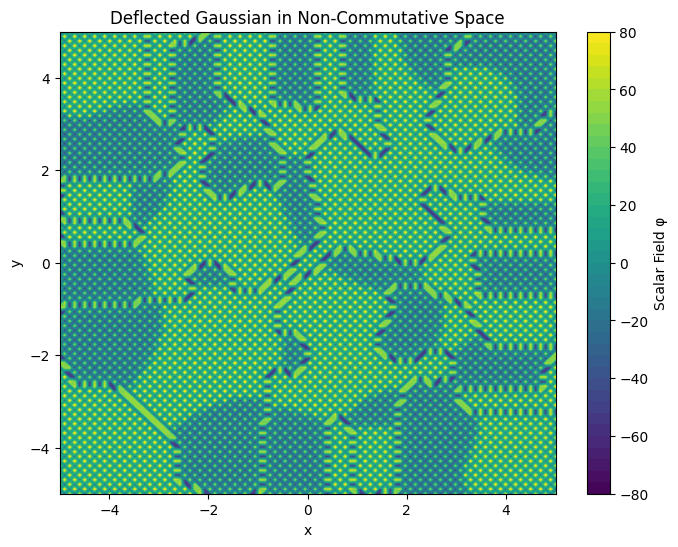

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define 2D Gaussian function
def gaussian(x, y, sigma, mean):
    return 1.0/(2*np.pi*sigma**2) * np.exp(-(x-mean)**2/(2*sigma**2) - (y-mean)**2/(2*sigma**2))

# Grid parameters
nx, ny = 100, 100
x_vals = np.linspace(-5, 5, nx)
y_vals = np.linspace(-5, 5, ny)
dx = x_vals[1] - x_vals[0]
dy = y_vals[1] - y_vals[0]
X, Y = np.meshgrid(x_vals, y_vals)

# Initial field configuration
phi = gaussian(X, Y, 1.0, 0.0)

# Define finite difference functions
def laplacian(phi, dx, dy):
    phi_xx = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dx**2
    phi_yy = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dy**2
    return phi_xx + phi_yy

def mixed_derivative(phi, dx, dy):
    phi_x_forward = (np.roll(phi, -1, axis=1) - phi) / dx
    phi_x_backward = (phi - np.roll(phi, 1, axis=1)) / dx
    phi_x = (phi_x_forward + phi_x_backward) / 2

    phi_y_forward = (np.roll(phi, -1, axis=0) - phi) / dy
    phi_y_backward = (phi - np.roll(phi, 1, axis=0)) / dy
    phi_y = (phi_y_forward + phi_y_backward) / 2

    phi_xy = (np.roll(phi_x, -1, axis=0) - np.roll(phi_x, 1, axis=0)) / (2*dy)
    return phi_xy

# Parameters
m = 1.0          # Mass parameter
lambda_ = 1.0    # Self-interaction coupling
epsilon = 0.1    # Non-commutative correction strength
theta_val = 0.5  # Non-commutative parameter
dt = 0.001       # Time step
num_steps = 1000 # Number of time steps

# Time evolution
for step in range(num_steps):
    lap_phi = laplacian(phi, dx, dy)
    mixed_phi = mixed_derivative(phi, dx, dy)
    dphi_dt = - (lap_phi + m**2 * phi + (lambda_ / 6) * phi**3 + epsilon * theta_val**2 * mixed_phi)
    phi += dt * dphi_dt

    # Optional: monitor convergence
    if step % 100 == 0:
        max_change = np.max(np.abs(dphi_dt))
        print(f"Step {step}, Max change: {max_change}")
        if max_change < 1e-6:
            break

# Visualization
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=50, cmap='viridis')
plt.colorbar(label='Scalar Field φ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deflected Gaussian in Non-Commutative Space')
plt.show()

Step 0, Max change: 2.314961496624527
Step 100, Max change: 34333.40458646944
Step 200, Max change: 32481.12615857142
Step 300, Max change: 32434.569678767966
Step 400, Max change: 32446.724870703645
Step 500, Max change: 32436.268657107907
Step 600, Max change: 32434.623004878977
Step 700, Max change: 32435.612462355282
Step 800, Max change: 32435.77120889615
Step 900, Max change: 32435.806364888602


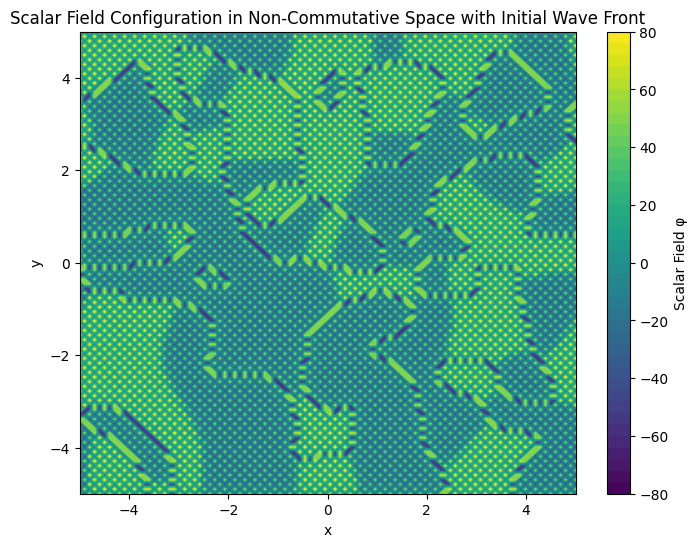

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
nx, ny = 100, 100
x_vals = np.linspace(-5, 5, nx)
y_vals = np.linspace(-5, 5, ny)
dx = x_vals[1] - x_vals[0]
dy = y_vals[1] - y_vals[0]
X, Y = np.meshgrid(x_vals, y_vals)

# Initial field configuration
phi = X*np.exp(-X**2 - Y**2)

# Define finite difference functions
def laplacian(phi, dx, dy):
    phi_xx = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dx**2
    phi_yy = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dy**2
    return phi_xx + phi_yy

def mixed_derivative(phi, dx, dy):
    phi_x_forward = (np.roll(phi, -1, axis=1) - phi) / dx
    phi_x_backward = (phi - np.roll(phi, 1, axis=1)) / dx
    phi_x = (phi_x_forward + phi_x_backward) / 2

    phi_y_forward = (np.roll(phi, -1, axis=0) - phi) / dy
    phi_y_backward = (phi - np.roll(phi, 1, axis=0)) / dy
    phi_y = (phi_y_forward + phi_y_backward) / 2

    phi_xy = (np.roll(phi_x, -1, axis=0) - np.roll(phi_x, 1, axis=0)) / (2*dy)
    return phi_xy

# Parameters
m = 1.0          # Mass parameter
lambda_ = 1.0    # Self-interaction coupling
epsilon = 0.1    # Non-commutative correction strength
theta_val = 0.5  # Non-commutative parameter
dt = 0.001       # Time step
num_steps = 1000 # Number of time steps

# Time evolution
for step in range(num_steps):
    lap_phi = laplacian(phi, dx, dy)
    mixed_phi = mixed_derivative(phi, dx, dy)
    dphi_dt = - (lap_phi + m**2 * phi + (lambda_ / 6) * phi**3 + epsilon * theta_val**2 * mixed_phi)
    phi += dt * dphi_dt

    # Optional: monitor convergence
    if step % 100 == 0:
        max_change = np.max(np.abs(dphi_dt))
        print(f"Step {step}, Max change: {max_change}")
        if max_change < 1e-6:
            break

# Visualization
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=50, cmap='viridis')
plt.colorbar(label='Scalar Field φ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scalar Field Configuration in Non-Commutative Space with Initial Wave Front')
plt.show()

Step 0, Max change: 0.009995071896625215, Action S(t): -0.0015957488285892
Step 50, Max change: 0.022202966549179262, Action S(t): -0.001555710452729311
Step 100, Max change: 0.19067988077089315, Action S(t): 0.0013033511368386566
Step 150, Max change: 4.270879649863371, Action S(t): 1.3801103729926945
Step 200, Max change: 98.38433805825625, Action S(t): 1043.9655263517511
Step 250, Max change: 2468.6146517634515, Action S(t): 979571.326846074
Step 300, Max change: 77093.71080744387, Action S(t): 1006791916.5915622
Step 350, Max change: 204574.05886045218, Action S(t): 18435250843.824814
Step 400, Max change: 209306.4292815963, Action S(t): 21833492605.67813
Step 450, Max change: 210436.4052743057, Action S(t): 43781217246.99912


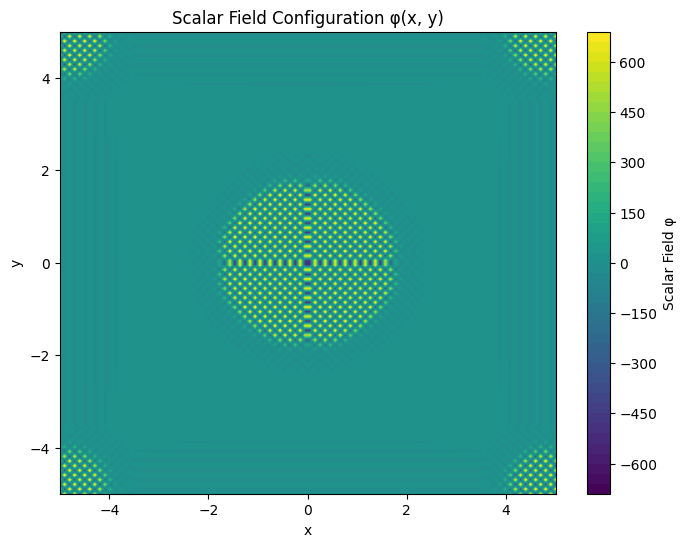

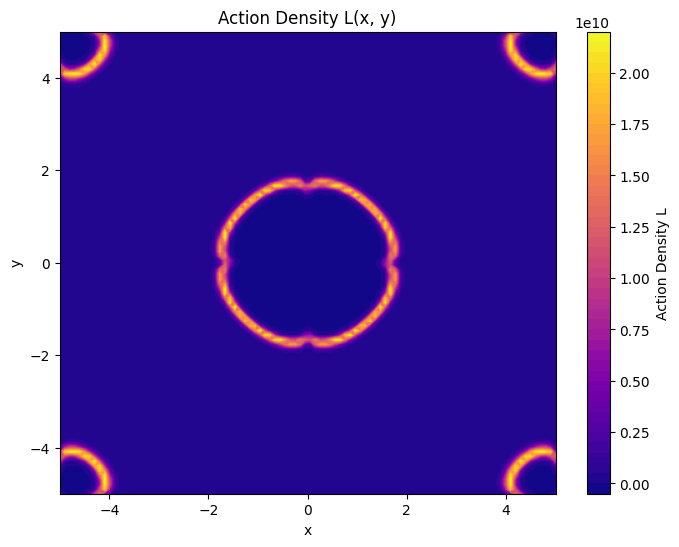

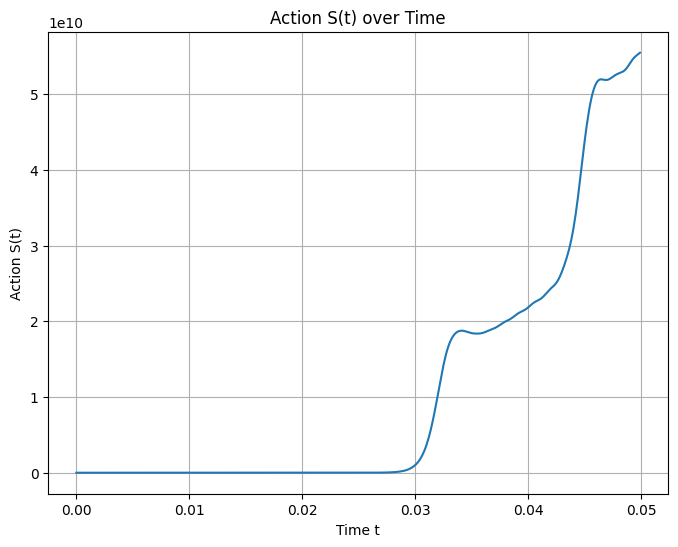

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# Physical parameters
m = 1.0           # Mass parameter
lambda_ = 0.01    # Reduced self-interaction coupling for stability
epsilon = 0.01    # Reduced non-commutative correction strength
theta = 0.5       # Non-commutative parameter
dt = 1e-4         # Further reduced time step for stability
num_steps = 500   # Number of time steps

# Grid parameters
nx, ny = 100, 100
x_vals = np.linspace(-5, 5, nx)
y_vals = np.linspace(-5, 5, ny)
dx = x_vals[1] - x_vals[0]
dy = y_vals[1] - y_vals[0]
X, Y = np.meshgrid(x_vals, y_vals)

# Initial field configuration - scaled down
phi = 0.01 * np.tanh(np.sqrt(X**2 + Y**2) - 2)  # Further scaled down initial condition

# Initialize phi at previous time step for semi-implicit method
phi_prev = phi.copy()

def laplacian(phi, dx, dy):
    phi_xx = (np.roll(phi, -1, axis=1) - 2*phi + np.roll(phi, 1, axis=1)) / dx**2
    phi_yy = (np.roll(phi, -1, axis=0) - 2*phi + np.roll(phi, 1, axis=0)) / dy**2
    return phi_xx + phi_yy

def mixed_derivative(phi, dx, dy):
    phi_x = (np.roll(phi, -1, axis=1) - np.roll(phi, 1, axis=1)) / (2*dx)
    phi_y = (np.roll(phi, -1, axis=0) - np.roll(phi, 1, axis=0)) / (2*dy)
    phi_xy = (np.roll(phi_x, -1, axis=0) - np.roll(phi_x, 1, axis=0)) / (2*dy)
    return phi_xy

def L_func(phi_t, phi_x, phi_y, phi, epsilon, theta, m, lambda_):
    V = 0.5 * m**2 * phi**2 + (lambda_ / 24) * phi**4
    L = 0.5 * phi_t**2 - 0.5 * (phi_x**2 + phi_y**2) - V + epsilon * theta * phi_x * phi_y
    return L

# Arrays to store action over time
S_t_values = []
time_values = []

# Time evolution using semi-implicit method
for step in range(num_steps):
    # Compute derivatives
    lap_phi = laplacian(phi, dx, dy)
    mixed_phi = mixed_derivative(phi, dx, dy)
    phi_cubed = phi**3

    # Semi-implicit update: Use average of phi and phi_prev for nonlinear terms
    phi_avg = 0.5 * (phi + phi_prev)

    # Update phi using stable scheme
    dphi_dt = - (lap_phi + m**2 * phi + (lambda_ / 6) * phi_avg**3 + epsilon * theta * mixed_phi)
    phi_new = phi + dt * dphi_dt

    # Update phi_prev and phi
    phi_prev = phi.copy()
    phi = phi_new

    # Ensure phi remains finite
    phi = np.nan_to_num(phi, nan=0.0, posinf=1e5, neginf=-1e5)

    # Compute phi_t (time derivative)
    phi_t = dphi_dt

    # Compute spatial derivatives
    phi_x = (np.roll(phi, -1, axis=1) - np.roll(phi, 1, axis=1)) / (2 * dx)
    phi_y = (np.roll(phi, -1, axis=0) - np.roll(phi, 1, axis=0)) / (2 * dy)

    # Compute action density L(x, y, t)
    V = 0.5 * m**2 * phi**2 + (lambda_ / 24) * phi**4
    # Avoid overflow in V
    V = np.nan_to_num(V, nan=1e10, posinf=1e10, neginf=-1e10)
    L = 0.5 * phi_t**2 - 0.5 * (phi_x**2 + phi_y**2) - V + epsilon * theta * phi_x * phi_y

    # Integrate L over space to get S(t)
    S_t = simpson(simpson(L, x=x_vals), x=y_vals)
    S_t_values.append(S_t)
    time_values.append(step * dt)

    # Monitor convergence every 50 steps
    if step % 50 == 0:
        max_change = np.max(np.abs(dphi_dt))
        print(f"Step {step}, Max change: {max_change}, Action S(t): {S_t}")

    # Break if solution diverges
    if np.isnan(phi).any() or np.isinf(phi).any():
        print("Numerical instability detected. Stopping simulation.")
        break

# Visualization of Scalar Field φ(x, y)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, levels=50, cmap='viridis')
plt.colorbar(label='Scalar Field φ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scalar Field Configuration φ(x, y)')
plt.show()

# Visualization of Action Density L(x, y)
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, L, levels=50, cmap='plasma')
plt.colorbar(label='Action Density L')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Action Density L(x, y)')
plt.show()

# Visualization of Action S(t) over Time
plt.figure(figsize=(8, 6))
plt.plot(time_values, S_t_values)
plt.xlabel('Time t')
plt.ylabel('Action S(t)')
plt.title('Action S(t) over Time')
plt.grid(True)
plt.show()